 Step 1: Data Extraction

Uploading the dataset in Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory1.csv to weatherHistory1.csv


Uploaded it using pandas

In [ ]:
import pandas as pd

# Replace with your actual file name
df = pd.read_csv('weatherHistory1.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Understanding the data structure

In [ ]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

Step 2: Data Transformation

Cleaning & Preprocessing

In [ ]:
#First we drop the duplicates
df = df.drop_duplicates()

In [ ]:
#Then we handle missing values
df = df.dropna()

In [ ]:
#Then we convert date column to date time
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])

<ipython-input-7-8a849c10877d>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [ ]:
#We can now check for the data types
df.dtypes

,0
Formatted Date,object
Summary,object
Precip Type,object
Temperature (C),float64
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),float64
Visibility (km),float64
Loud Cover,float64


Normalization or Aggregation (Example: Convert temp to Celsius & Round)

In [ ]:
# Normalize temperature (round to 1 decimal place)
df['Temperature (C)'] = df['Temperature (C)'].round(1)


In [ ]:
#'Formatted Date' is properly converted to datetime format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], errors='coerce')


In [ ]:
#Average temp per day
#Group by just the DATE  and calculate daily average temperature
#The .dt.date extracts the date portion from the datetime
daily_avg = df.groupby(df['Formatted Date'].dt.date)['Temperature (C)'].mean().reset_index()
daily_avg.columns = ['Date', 'Average Temp (C)']  #Rename columns for clarity
# Preview the aggregated results
daily_avg.head()



,Date,Average Temp (C)
0,2006-03-26,12.833333
1,2006-03-27,14.079167
2,2006-03-28,13.954167
3,2006-03-29,10.408333
4,2006-03-30,11.133333


Adding a time of day column:

In [ ]:
def get_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Hour'] = df['Formatted Date'].dt.hour
df['Part of Day'] = df['Hour'].apply(get_part_of_day)


In [ ]:
df['Weekday'] = df['Formatted Date'].dt.day_name()


We cleaned the dataset by removing missing and duplicate rows. We normalized temperature values, converted timestamps, and added a ‘Part of Day’ feature based on the hour. This enables better temporal analysis in later stages.

Step 3: Data Loading

Step 3.1: Set Up SQLite Connection

In [ ]:
import sqlite3

# Connect to SQLite (creates a new file in your Colab environment)
conn = sqlite3.connect('weather_data.db')  # This file will be saved in the current directory

# Optional: create a cursor to run raw SQL if needed
cursor = conn.cursor()


Step 3.3: Run a Verification Query

In [ ]:
import sqlite3
import pandas as pd

# 1. Connect to (or create) the database
conn = sqlite3.connect('weather_data.db')


We used Python's built-in sqlite3 module.

This line creates a new SQLite database file called weather_data.db in your Google Colab environment (or reuses it if it already exists).

In [ ]:
# 2. Save the cleaned DataFrame (df) to a table
df.to_sql('weather_cleaned', conn, if_exists='replace', index=False)


95912

In [ ]:
# 3. Save the daily average DataFrame (daily_avg) to another table
daily_avg.to_sql('daily_avg_temp', conn, if_exists='replace', index=False)

2356

We aggregated the aggregated average temperature per day. The saved them to two tables: 'weather_cleaned' and 'daily_avg_temp'.

In [ ]:
# 5. Now run the verification queries
result = pd.read_sql_query("SELECT COUNT(*) as row_count FROM weather_cleaned", conn)
print("Rows in 'weather_cleaned':", result['row_count'][0])
reult = pd.read_sql_query("SELECT COUNT(*) as row_count FROM daily_avg_temp", conn)
print("Rows in 'daily_avg_temp':", result['row_count'][0])

Rows in 'weather_cleaned': 95912
Rows in 'daily_avg_temp': 95912


We queried the database to confirm that the tables were successfully created and populated.
Output like Rows in 'weather_cleaned' shows that the data is now stored.



Step 4.1: Analyze the Data

In [ ]:
# Summary stats for temperature
df['Temperature (C)'].describe()


,Temperature (C)
count,95912.000000
mean,11.938745
std,9.569917
min,-21.800000
25%,4.600000
50%,12.000000
75%,18.800000
max,39.900000


Grouping (e.g., by part of day):

In [ ]:
# Average temperature by part of day (a feature we created earlier)
part_of_day_avg = df.groupby('Part of Day')['Temperature (C)'].mean().reset_index()
print(part_of_day_avg)


  Part of Day  Temperature (C)
0   Afternoon        22.856619
1     Evening        20.874186
2     Morning        16.373716
3       Night         7.101484


Step 4.2: Create Visualizations
1. Line Chart of Daily Average Temperature

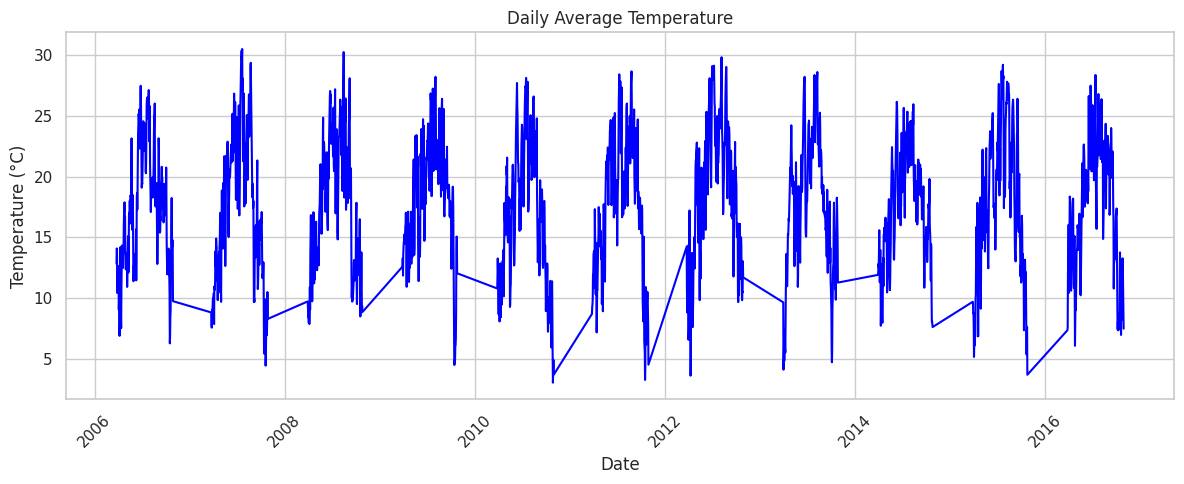

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_avg['Date'], daily_avg['Average Temp (C)'], color='blue')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


2. Bar Chart: Average Temp by Part of Day


<ipython-input-34-ff245e7576ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=part_of_day_avg, x='Part of Day', y='Temperature (C)', palette='coolwarm')


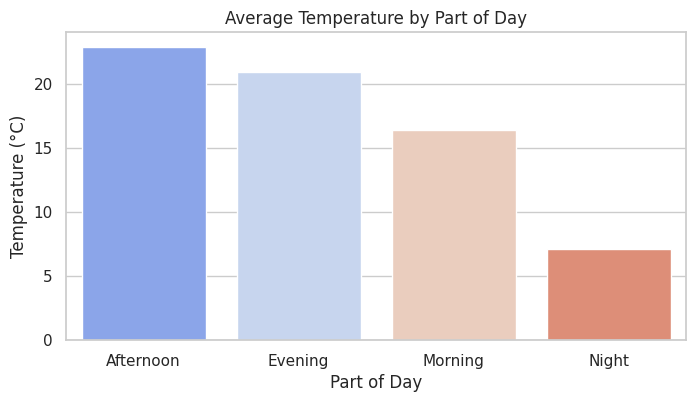

In [ ]:
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
sns.barplot(data=part_of_day_avg, x='Part of Day', y='Temperature (C)', palette='coolwarm')
plt.title('Average Temperature by Part of Day')
plt.ylabel('Temperature (°C)')
plt.show()


Orchestration and Cloud Integration (Extra Credit)

The run_pipeline() code (if modularized)

The auth.authenticate_user() block

The to_gbq() upload code

The SQL verification query

Step 1: Authenticate in Colab

In [ ]:
from google.colab import auth
auth.authenticate_user()


This will prompt a log in and authorize access to my GCP account.

Step 2: Install pandas-gbq

In [ ]:
!pip install -q pandas-gbq --upgrade


Step 3: Create a BigQuery Dataset on GCP

In [ ]:
# First, make sure your authentication is valid
from google.colab import auth
auth.authenticate_user()

# Create BigQuery client with project ID etl-final-project
from google.cloud import bigquery
project_id = "etl-final-project"  # Your project ID
client = bigquery.Client(project=project_id)
print(f"Using project: {client.project}")

Using project: etl-final-project


In [ ]:
# First, authenticate
from google.colab import auth
auth.authenticate_user()

# Create BigQuery client project ID
from google.cloud import bigquery
project_id = "etl-final-project"
client = bigquery.Client(project=project_id)

# Let's print the column names to see what we're dealing with
print("Original column names:")
for col in df.columns:
    print(f"- {col}")

# More thorough column name cleaning
import re

def clean_column_name(name):
    # Replace any character that's not a letter, number, or underscore with an underscore
    clean_name = re.sub(r'[^a-zA-Z0-9_]', '_', name)
    # Ensure name starts with a letter or underscore (BigQuery requirement)
    if clean_name[0].isdigit():
        clean_name = '_' + clean_name
    return clean_name

# Applying thorough cleaning to both DataFrames
#Necessary process because GCP is strict on variable format so everthing had to be changed
df_clean = df.copy()
df_clean.columns = [clean_column_name(col) for col in df_clean.columns]

daily_avg_clean = daily_avg.copy()
daily_avg_clean.columns = [clean_column_name(col) for col in daily_avg_clean.columns]

# Print the cleaned column names
print("\nCleaned column names:")
for col in df_clean.columns:
    print(f"- {col}")
# Now upload the cleaned DataFrames to BigQuery
from pandas_gbq import to_gbq

# Upload main dataframe with clean column names
to_gbq(df_clean,
       'weather_data.weather_cleaned',
       project_id=project_id,
       if_exists='replace')
# Upload daily averages with clean column names
to_gbq(daily_avg_clean,
       'weather_data.daily_avg_temp',
       project_id=project_id,
       if_exists='replace')
print("Data successfully uploaded to BigQuery")

Original column names:
- Formatted Date
- Summary
- Precip Type
- Temperature (C)
- Apparent Temperature (C)
- Humidity
- Wind Speed (km/h)
- Wind Bearing (degrees)
- Visibility (km)
- Loud Cover
- Pressure (millibars)
- Daily Summary
- Hour
- Part of Day
- Weekday

Cleaned column names:
- Formatted_Date
- Summary
- Precip_Type
- Temperature__C_
- Apparent_Temperature__C_
- Humidity
- Wind_Speed__km_h_
- Wind_Bearing__degrees_
- Visibility__km_
- Loud_Cover
- Pressure__millibars_
- Daily_Summary
- Hour
- Part_of_Day
- Weekday


100%|██████████| 1/1 [00:00<00:00, 6355.01it/s]

Data successfully uploaded to BigQuery


This approach uses regular expressions to thoroughly sanitize all column names, replacing any character that's not a letter, number, or underscore with an underscore. It also ensures the column name starts with a letter or underscore (as required by BigQuery).
This more comprehensive cleaning should handle any problematic characters in your column names, including forward slashes, parentheses, spaces, and other special characters that BigQuery doesn't allow.

Next we verify if the tables were created

In [ ]:
# Verify tables were created
tables = list(client.list_tables(f"{project_id}.weather_data"))
print("Tables in dataset:")
for table in tables:
    print(f"- {table.table_id}")

# Check row count in the weather_cleaned table
query = """
SELECT COUNT(*) as row_count
FROM `weather_data.weather_cleaned`
"""
query_job = client.query(query)
results = query_job.result()
for row in results:
    print(f"Total rows in weather_cleaned table: {row.row_count}")

Tables in dataset:
- daily_avg_temp
- weather_cleaned
Total rows in weather_cleaned table: 95912


Verify the Upload with a Query
First, let's verify your data is properly loaded in BigQuery by running some queries:

In [ ]:
# Verify tables were created
tables = list(client.list_tables(f"{project_id}.weather_data"))
print("Tables in dataset:")
for table in tables:
    print(f"- {table.table_id}")

# Check row count in the weather_cleaned table
query = """
SELECT COUNT(*) as row_count
FROM `weather_data.weather_cleaned`
"""
query_job = client.query(query)
results = query_job.result()
for row in results:
    print(f"Total rows in weather_cleaned table: {row.row_count}")

# Get a sample of the data to confirm it looks correct
query = """
SELECT *
FROM `weather_data.weather_cleaned`
LIMIT 5
"""
sample_data = client.query(query).to_dataframe()
print("\nSample data from weather_cleaned:")
print(sample_data)

Tables in dataset:
- daily_avg_temp
- weather_cleaned
Total rows in weather_cleaned table: 95912

Sample data from weather_cleaned:
             Formatted_Date        Summary Precip_Type  Temperature__C_  \
0 2006-03-31 22:00:00+00:00  Partly Cloudy        rain              9.5   
1 2006-03-31 23:00:00+00:00  Partly Cloudy        rain              9.4   
2 2006-04-01 00:00:00+00:00  Mostly Cloudy        rain              9.4   
3 2006-04-01 01:00:00+00:00  Partly Cloudy        rain              8.3   
4 2006-04-01 02:00:00+00:00  Mostly Cloudy        rain              8.8   

   Apparent_Temperature__C_  Humidity  Wind_Speed__km_h_  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind_Bearing__degrees_  Visibility__km_  Loud_Cover  

Step 2: Run an Aggregation Query
Let's run a more complex query to demonstrate that your data is ready for analysis:

In [ ]:
# 1. Temperature statistics by part of day
query = """
SELECT
  Part_of_Day,
  AVG(Temperature__C_) as avg_temp,
  MIN(Temperature__C_) as min_temp,
  MAX(Temperature__C_) as max_temp,
  STDDEV(Temperature__C_) as std_temp,
  COUNT(*) as count
FROM
  `weather_data.weather_cleaned`
GROUP BY
  Part_of_Day
ORDER BY
  avg_temp DESC
"""
results = client.query(query).to_dataframe()
print("\nTemperature statistics by part of day:")
print(results)

# 2. Weather conditions count (most common weather types)
query = """
SELECT
  Summary,
  COUNT(*) as count,
  COUNT(*) * 100.0 / (SELECT COUNT(*) FROM `weather_data.weather_cleaned`) as percentage
FROM
  `weather_data.weather_cleaned`
GROUP BY
  Summary
ORDER BY
  count DESC
LIMIT 10
"""
results = client.query(query).to_dataframe()
print("\nMost common weather conditions:")
print(results)

# 3. Average temperature by weekday
query = """
SELECT
  Weekday,
  AVG(Temperature__C_) as avg_temp,
  AVG(Apparent_Temperature__C_) as avg_feels_like,
  AVG(Humidity) as avg_humidity
FROM
  `weather_data.weather_cleaned`
GROUP BY
  Weekday
ORDER BY
  CASE
    WHEN Weekday = 'Monday' THEN 1
    WHEN Weekday = 'Tuesday' THEN 2
    WHEN Weekday = 'Wednesday' THEN 3
    WHEN Weekday = 'Thursday' THEN 4
    WHEN Weekday = 'Friday' THEN 5
    WHEN Weekday = 'Saturday' THEN 6
    WHEN Weekday = 'Sunday' THEN 7
  END
"""
results = client.query(query).to_dataframe()
print("\nAverage temperature by weekday:")
print(results)

# 4. Correlation between temperature and humidity
query = """
SELECT
  CORR(Temperature__C_, Humidity) as temp_humidity_correlation,
  CORR(Temperature__C_, Wind_Speed__km_h_) as temp_wind_correlation,
  CORR(Temperature__C_, Pressure__millibars_) as temp_pressure_correlation,
  CORR(Humidity, Wind_Speed__km_h_) as humidity_wind_correlation
FROM
  `weather_data.weather_cleaned`
"""
results = client.query(query).to_dataframe()
print("\nWeather correlations:")
print(results)

# 5. Monthly temperature trends
query = """
SELECT
  EXTRACT(MONTH FROM CAST(Formatted_Date AS TIMESTAMP)) as month,
  EXTRACT(YEAR FROM CAST(Formatted_Date AS TIMESTAMP)) as year,
  AVG(Temperature__C_) as avg_temp,
  AVG(Humidity) as avg_humidity,
  AVG(Wind_Speed__km_h_) as avg_wind_speed
FROM
  `weather_data.weather_cleaned`
GROUP BY
  year, month
ORDER BY
  year, month
"""
results = client.query(query).to_dataframe()
print("\nMonthly temperature trends:")
print(results)

# 6. Temperature difference: actual vs. apparent (feels like)
query = """
SELECT
  Part_of_Day,
  AVG(Temperature__C_) as avg_actual_temp,
  AVG(Apparent_Temperature__C_) as avg_feels_like_temp,
  AVG(Apparent_Temperature__C_ - Temperature__C_) as avg_temp_difference
FROM
  `weather_data.weather_cleaned`
GROUP BY
  Part_of_Day
ORDER BY
  avg_temp_difference DESC
"""
results = client.query(query).to_dataframe()
print("\nTemperature difference (feels like vs actual):")
print(results)

# 7. Analyzing precipitation types
query = """
SELECT
  Precip_Type,
  COUNT(*) as count,
  AVG(Temperature__C_) as avg_temp,
  AVG(Humidity) as avg_humidity,
  AVG(Wind_Speed__km_h_) as avg_wind_speed
FROM
  `weather_data.weather_cleaned`
WHERE
  Precip_Type IS NOT NULL
GROUP BY
  Precip_Type
ORDER BY
  count DESC
"""
results = client.query(query).to_dataframe()
print("\nPrecipitation type analysis:")
print(results)


Temperature statistics by part of day:
  Part_of_Day   avg_temp  min_temp  max_temp  std_temp  count
0   Afternoon  22.856619       3.9      39.9  6.517763  11664
1     Evening  20.874186       2.2      39.6  6.638429   9332
2     Morning  16.373716      -6.1      36.6  6.508763  16356
3       Night   7.101484     -21.8      30.9  7.571365  58560

Most common weather conditions:
                    Summary  count  percentage
0             Partly Cloudy  31628   32.976061
1             Mostly Cloudy  27914   29.103762
2                  Overcast  16516   17.219952
3                     Clear  10746   11.204020
4                     Foggy   7117    7.420344
5       Breezy and Overcast    528    0.550505
6  Breezy and Mostly Cloudy    516    0.537993
7  Breezy and Partly Cloudy    386    0.402452
8     Dry and Partly Cloudy     86    0.089666
9   Windy and Partly Cloudy     67    0.069856

Average temperature by weekday:
     Weekday   avg_temp  avg_feels_like  avg_humidity
0       None 

ERROR HANDLING! AND LOGGING!

In [ ]:
# -*- coding: utf-8 -*-
"""ETL Pipeline_Project with Error Handling

This script implements a complete ETL pipeline with robust error handling and logging
"""

# Import necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import logging
import sys
import os
from datetime import datetime
from google.cloud import bigquery
from pandas_gbq import to_gbq
from google.colab import auth, files

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("etl_pipeline.log"),
        logging.StreamHandler(sys.stdout)
    ]
)

logger = logging.getLogger("weather_etl")

def extract_data():
    """
    Extract data from CSV file

    Returns:
        DataFrame: Pandas DataFrame containing the raw data
    """
    try:
        logger.info("Starting data extraction phase")

        # Try to use an existing file first
        if os.path.exists('weatherHistory1.csv'):
            logger.info("Using existing CSV file")
        else:
            # If file doesn't exist, prompt for upload
            logger.info("CSV file not found, requesting upload")
            uploaded = files.upload()
            if not uploaded:
                raise FileNotFoundError("No file was uploaded")

        # Load the CSV file
        df = pd.read_csv('weatherHistory1.csv')

        # Validate the data has expected columns
        required_columns = ['Formatted Date', 'Temperature (C)', 'Humidity']
        missing_columns = [col for col in required_columns if col not in df.columns]

        if missing_columns:
            raise ValueError(f"CSV is missing required columns: {missing_columns}")

        logger.info(f"Successfully extracted data with {df.shape[0]} rows and {df.shape[1]} columns")

        # Log basic statistics for monitoring
        logger.info(f"Data extract summary: {len(df)} rows, {df.memory_usage().sum() / 1024**2:.2f} MB")

        return df

    except FileNotFoundError as e:
        logger.error(f"File not found error: {str(e)}")
        raise
    except pd.errors.ParserError as e:
        logger.error(f"CSV parsing error: {str(e)}")
        raise
    except ValueError as e:
        logger.error(f"Value error during extraction: {str(e)}")
        raise
    except Exception as e:
        logger.error(f"Unexpected error during extraction: {str(e)}")
        raise

def transform_data(df):
    """
    Clean and transform the data

    Args:
        df: Raw DataFrame to transform

    Returns:
        tuple: Transformed main DataFrame and daily average DataFrame
    """
    try:
        logger.info("Starting data transformation phase")

        # Check if DataFrame is empty
        if df.empty:
            raise ValueError("DataFrame is empty, cannot transform")

        # Track original row count for validation
        original_row_count = len(df)
        logger.info(f"Original row count: {original_row_count}")

        # Create a copy to avoid modifying the original
        df_transformed = df.copy()

        # 1. Drop duplicates
        try:
            df_transformed = df_transformed.drop_duplicates()
            logger.info(f"Removed {original_row_count - len(df_transformed)} duplicate rows")
        except Exception as e:
            logger.error(f"Error removing duplicates: {str(e)}")
            raise

        # 2. Handle missing values
        try:
            missing_before = df_transformed.isna().sum().sum()
            df_transformed = df_transformed.dropna()
            logger.info(f"Dropped {missing_before} missing values")
        except Exception as e:
            logger.error(f"Error handling missing values: {str(e)}")
            raise

        # 3. Convert date column to datetime
        try:
            df_transformed['Formatted Date'] = pd.to_datetime(df_transformed['Formatted Date'], errors='coerce')
            # Drop rows where date conversion failed
            invalid_dates = df_transformed['Formatted Date'].isna().sum()
            if invalid_dates > 0:
                df_transformed = df_transformed.dropna(subset=['Formatted Date'])
                logger.warning(f"Dropped {invalid_dates} rows with invalid dates")
        except Exception as e:
            logger.error(f"Error converting dates: {str(e)}")
            raise

        # 4. Normalize temperature (round to 1 decimal place)
        try:
            df_transformed['Temperature (C)'] = df_transformed['Temperature (C)'].round(1)
        except Exception as e:
            logger.error(f"Error normalizing temperature: {str(e)}")
            raise

        # 5. Feature Engineering: Add time of day column
        try:
            def get_part_of_day(hour):
                if 5 <= hour < 12:
                    return 'Morning'
                elif 12 <= hour < 17:
                    return 'Afternoon'
                elif 17 <= hour < 21:
                    return 'Evening'
                else:
                    return 'Night'

            df_transformed['Hour'] = df_transformed['Formatted Date'].dt.hour
            df_transformed['Part of Day'] = df_transformed['Hour'].apply(get_part_of_day)
            df_transformed['Weekday'] = df_transformed['Formatted Date'].dt.day_name()
            logger.info("Successfully added time features (Hour, Part of Day, Weekday)")
        except Exception as e:
            logger.error(f"Error during feature engineering: {str(e)}")
            raise

        # 6. Data Aggregation: Calculate daily average
        try:
            daily_avg = df_transformed.groupby(df_transformed['Formatted Date'].dt.date)['Temperature (C)'].mean().reset_index()
            daily_avg.columns = ['Date', 'Average Temp (C)']
            logger.info(f"Created daily average temperature with {len(daily_avg)} days")
        except Exception as e:
            logger.error(f"Error calculating daily averages: {str(e)}")
            raise

        # Log transformation summary
        logger.info(f"Transformation complete: {len(df_transformed)} rows remaining after cleaning")
        logger.info(f"Transformation summary: Removed {original_row_count - len(df_transformed)} rows in total")

        return df_transformed, daily_avg

    except Exception as e:
        logger.error(f"Transformation failed: {str(e)}")
        raise

def load_to_sqlite(df, daily_avg):
    """
    Load data to SQLite database

    Args:
        df: Main transformed DataFrame
        daily_avg: Daily average temperature DataFrame

    Returns:
        sqlite3.Connection: Database connection
    """
    try:
        logger.info("Starting SQLite database loading phase")

        # Connect to SQLite database
        db_path = 'weather_data.db'
        conn = sqlite3.connect(db_path)

        # Save DataFrames to tables
        try:
            df.to_sql('weather_cleaned', conn, if_exists='replace', index=False)
            logger.info(f"Successfully loaded {len(df)} rows to 'weather_cleaned' table")
        except sqlite3.Error as e:
            logger.error(f"SQLite error loading main table: {str(e)}")
            raise

        try:
            daily_avg.to_sql('daily_avg_temp', conn, if_exists='replace', index=False)
            logger.info(f"Successfully loaded {len(daily_avg)} rows to 'daily_avg_temp' table")
        except sqlite3.Error as e:
            logger.error(f"SQLite error loading daily average table: {str(e)}")
            raise

        # Verify the data was loaded correctly
        try:
            cursor = conn.cursor()

            # Check main table
            cursor.execute("SELECT COUNT(*) as row_count FROM weather_cleaned")
            main_count = cursor.fetchone()[0]

            # Check daily average table
            cursor.execute("SELECT COUNT(*) as row_count FROM daily_avg_temp")
            daily_count = cursor.fetchone()[0]

            if main_count != len(df) or daily_count != len(daily_avg):
                logger.warning(f"Row count mismatch! DataFrame: {len(df)}, SQLite: {main_count}")
            else:
                logger.info("SQLite verification successful: row counts match")

        except sqlite3.Error as e:
            logger.error(f"Error verifying SQLite data: {str(e)}")

        return conn

    except sqlite3.Error as e:
        logger.error(f"SQLite database error: {str(e)}")
        raise
    except Exception as e:
        logger.error(f"Unexpected error during SQLite loading: {str(e)}")
        raise

def load_to_bigquery(df, daily_avg):
    """
    Load data to Google BigQuery

    Args:
        df: Main transformed DataFrame
        daily_avg: Daily average temperature DataFrame

    Returns:
        bool: Success indicator
    """
    try:
        logger.info("Starting BigQuery loading phase")

        # Authenticate
        try:
            auth.authenticate_user()
            logger.info("Authentication successful")
        except Exception as e:
            logger.error(f"Authentication failed: {str(e)}")
            raise

        # Set project ID
        project_id = "etl-final-project"

        # Create BigQuery client
        try:
            client = bigquery.Client(project=project_id)
            logger.info(f"Connected to BigQuery project: {client.project}")
        except Exception as e:
            logger.error(f"Failed to create BigQuery client: {str(e)}")
            raise

        # Clean column names for BigQuery compatibility
        try:
            def clean_column_name(name):
                # Replace any character that's not a letter, number, or underscore with an underscore
                clean_name = re.sub(r'[^a-zA-Z0-9_]', '_', name)
                # Ensure name starts with a letter or underscore (BigQuery requirement)
                if clean_name[0].isdigit():
                    clean_name = '_' + clean_name
                return clean_name

            # Apply column name cleaning to both DataFrames
            df_clean = df.copy()
            df_clean.columns = [clean_column_name(col) for col in df_clean.columns]

            daily_avg_clean = daily_avg.copy()
            daily_avg_clean.columns = [clean_column_name(col) for col in daily_avg_clean.columns]

            logger.info("Column names cleaned for BigQuery compatibility")
        except Exception as e:
            logger.error(f"Error cleaning column names: {str(e)}")
            raise

        # Upload main table
        try:
            to_gbq(df_clean,
                   'weather_data.weather_cleaned',
                   project_id=project_id,
                   if_exists='replace')
            logger.info(f"Successfully uploaded {len(df_clean)} rows to BigQuery table 'weather_data.weather_cleaned'")
        except Exception as e:
            logger.error(f"Error uploading main table to BigQuery: {str(e)}")
            raise

        # Upload daily average table
        try:
            to_gbq(daily_avg_clean,
                   'weather_data.daily_avg_temp',
                   project_id=project_id,
                   if_exists='replace')
            logger.info(f"Successfully uploaded {len(daily_avg_clean)} rows to BigQuery table 'weather_data.daily_avg_temp'")
        except Exception as e:
            logger.error(f"Error uploading daily average table to BigQuery: {str(e)}")
            raise

        # Verify tables were created
        try:
            tables = list(client.list_tables(f"{project_id}.weather_data"))
            table_names = [table.table_id for table in tables]

            if 'weather_cleaned' not in table_names or 'daily_avg_temp' not in table_names:
                logger.warning(f"Not all tables were created. Found: {table_names}")
            else:
                logger.info("BigQuery tables verified successfully")

            # Verify row counts
            query = """
            SELECT COUNT(*) as row_count
            FROM `weather_data.weather_cleaned`
            """
            query_job = client.query(query)
            results = query_job.result()
            for row in results:
                bq_count = row.row_count

            if bq_count != len(df_clean):
                logger.warning(f"BigQuery row count mismatch! DataFrame: {len(df_clean)}, BigQuery: {bq_count}")
            else:
                logger.info("BigQuery data verification successful")

        except Exception as e:
            logger.error(f"Error verifying BigQuery tables: {str(e)}")

        return True

    except Exception as e:
        logger.error(f"BigQuery loading failed: {str(e)}")
        return False

def create_visualizations(df, daily_avg):
    """
    Create basic visualizations

    Args:
        df: Main transformed DataFrame
        daily_avg: Daily average temperature DataFrame
    """
    try:
        logger.info("Creating visualizations")

        # 1. Line Chart of Daily Average Temperature
        try:
            plt.figure(figsize=(12, 5))
            plt.plot(daily_avg['Date'], daily_avg['Average Temp (C)'], color='blue')
            plt.title('Daily Average Temperature')
            plt.xlabel('Date')
            plt.ylabel('Temperature (°C)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.grid(True)
            plt.savefig('daily_avg_temp.png')
            logger.info("Created daily average temperature chart")
        except Exception as e:
            logger.error(f"Error creating daily average chart: {str(e)}")

        # 2. Bar Chart: Average Temp by Part of Day
        try:
            # Calculate average temperature by part of day
            part_of_day_avg = df.groupby('Part of Day')['Temperature (C)'].mean().reset_index()

            sns.set_theme(style="whitegrid")
            plt.figure(figsize=(8, 4))
            sns.barplot(data=part_of_day_avg, x='Part of Day', y='Temperature (C)', palette='coolwarm')
            plt.title('Average Temperature by Part of Day')
            plt.ylabel('Temperature (°C)')
            plt.savefig('temp_by_part_of_day.png')
            logger.info("Created temperature by part of day chart")
        except Exception as e:
            logger.error(f"Error creating part of day chart: {str(e)}")

    except Exception as e:
        logger.error(f"Visualization creation failed: {str(e)}")

def run_pipeline():
    """
    Main function to run the ETL pipeline
    """
    logger.info("="*50)
    logger.info("Starting ETL Pipeline: " + datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
    logger.info("="*50)

    success = False

    try:
        # EXTRACT
        raw_data = extract_data()

        # TRANSFORM
        transformed_data, daily_avg_data = transform_data(raw_data)

        # LOAD
        # SQLite
        sqlite_conn = load_to_sqlite(transformed_data, daily_avg_data)

        # BigQuery
        bigquery_success = load_to_bigquery(transformed_data, daily_avg_data)

        # Create visualizations
        create_visualizations(transformed_data, daily_avg_data)

        success = True
        logger.info("ETL Pipeline completed successfully!")

    except Exception as e:
        logger.error(f"ETL Pipeline failed: {str(e)}")

    finally:
        end_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        logger.info(f"ETL Pipeline ended at: {end_time}")
        logger.info(f"Pipeline status: {'Success' if success else 'Failed'}")
        logger.info("="*50)

    return success

# Run the pipeline if this file is run directly
if __name__ == "__main__":
    run_pipeline()

<ipython-input-59-781abe4540d1>:126: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_transformed['Formatted Date'] = pd.to_datetime(df_transformed['Formatted Date'], errors='coerce')
ERROR:weather_etl:Error during feature engineering: Can only use .dt accessor with datetimelike values
ERROR:weather_etl:Transformation failed: Can only use .dt accessor with datetimelike values
ERROR:weather_etl:ETL Pipeline failed: Can only use .dt accessor with datetimelike values
